In [1]:
import torch
import torchvision
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(f"{torchvision.__version__}")

0.15.2+cu118


In [2]:
train_data = datasets.FashionMNIST(
            root = 'data',
            train = True,
            download = True,
            transform = ToTensor(),
            target_transform = None)

test_data = datasets.FashionMNIST(
            root = 'data',
            train = False,
            download = True,
            transform = ToTensor())



100%|██████████| 26421880/26421880 [00:01<00:00, 15814668.04it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274405.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4981856.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8454297.96it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes

class_names

class_to_idx = train_data.class_to_idx

class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
print(f"shape : {image.shape} [C , H , W], label : {label} ")

shape : torch.Size([1, 28, 28]) [C , H , W], label : 9 


Text(0.5, 1.0, 'Ankle boot')

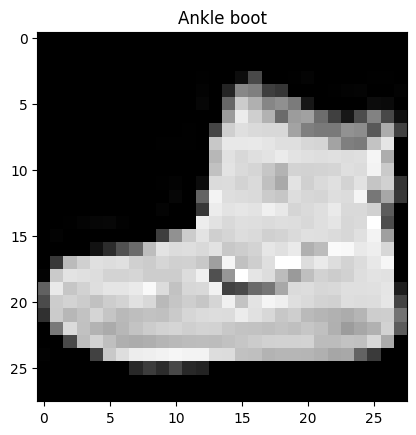

In [7]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(label = class_names[label])

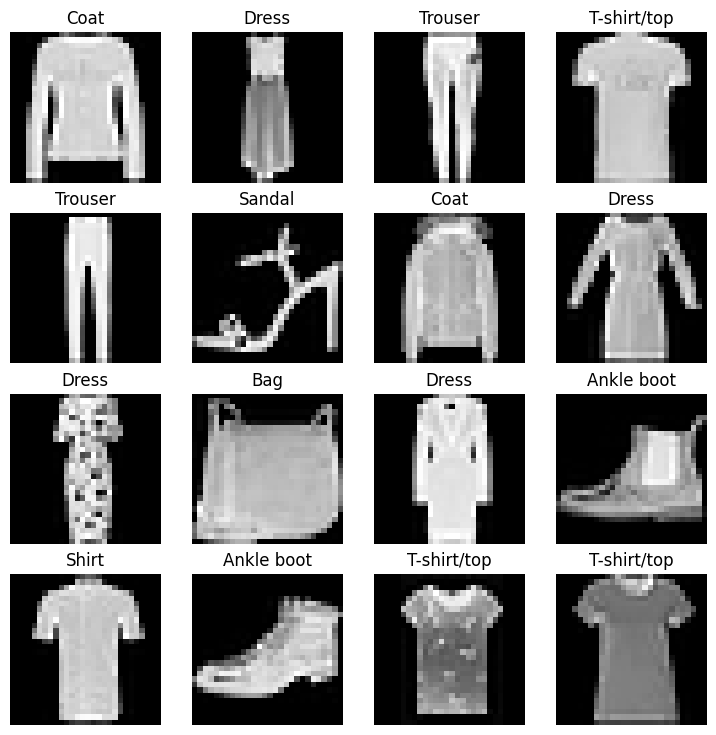

In [8]:
#torch.manual_seed(42)

fig = plt.figure(figsize = (9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size = [1]).item()
    img , label = train_data[random_idx]
    fig.add_subplot(rows , cols , i)
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(label = class_names[label])
    plt.axis(False)

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data ,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data ,
                              batch_size = BATCH_SIZE,
                              shuffle = False)


In [10]:
print(f"Dataloaders : {train_dataloader , test_dataloader}")
print(f"length of traindataloader : {len(train_dataloader)}")
print(f"length of testdataloader : {len(test_dataloader)}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7fa96b75b9a0>, <torch.utils.data.dataloader.DataLoader object at 0x7fa9692858a0>)
length of traindataloader : 1875
length of testdataloader : 313


In [11]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

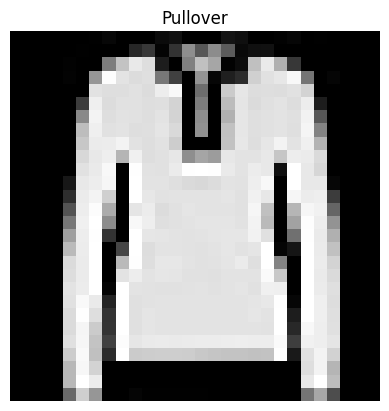

In [12]:
#torch.manual_seed(42)
rand_id = torch.randint(0,len(train_features_batch),size = [1]).item()
img , label = train_features_batch[rand_id] , train_labels_batch[rand_id]

plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)


In [13]:
flatten_model = nn.Flatten()
x = train_features_batch[0]

output = flatten_model(x) #perform the forward pass automatically
print(f"shape before flattening : {x.shape} , after flattening : {output.shape}")

shape before flattening : torch.Size([1, 28, 28]) , after flattening : torch.Size([1, 784])


In [14]:
from torch import nn

class fashionModelv0(nn.Module):
    def __init__(self,in_shape:int , hidden_units:int , out_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features = in_shape , out_features = hidden_units),
                                         nn.Linear(in_features = hidden_units , out_features = out_shape))

    def forward(self,x):
        return self.layer_stack(x)

In [15]:
torch.manual_seed(42)

model_0 = fashionModelv0(in_shape = 784 , hidden_units = 10 , out_shape = len(class_names)).to('cpu')

model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [16]:
import requests
from pathlib import Path

url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'

if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists')
else:
    print('downloading helper_functions.py')
    request  = requests.get(url)
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

downloading helper_functions.py


In [17]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.1)


In [18]:
from timeit import default_timer as timer

def print_train_time(start : float , end : float , device : torch.device = None):
    total_time = end - start
    print(f"Train time on {device} = {total_time:.3f} seconds")
    return total_time

start_time = timer()
end_time = timer()
print_train_time(start = start_time , end = end_time , device = 'cpu')

Train time on cpu = 0.000 seconds


3.435299999665631e-05

In [19]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for ep in tqdm(range(epochs)):
    print(f"Epoch : {ep} \n--------")
    train_loss = 0
    for batch,(x,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(x)

        loss = loss_fn(y_pred , y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"looked at {batch * len(x) }/ {len(train_dataloader.dataset)} samples ")

    train_loss /= len(train_dataloader)

    #----------------testing--------------------
    test_loss , test_acc = 0 , 0
    model_0.eval()
    with torch.inference_mode():
        for x_test , y_test in test_dataloader:
            test_pred = model_0(x_test)

            test_loss += loss_fn(test_pred , y_test)

            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"train loss {train_loss:.4f} | test loss {test_loss:.4f} | test acc {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_m0= print_train_time(start = train_time_start_on_cpu , end = train_time_end_on_cpu , device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
--------
looked at 0/ 60000 samples 
looked at 12800/ 60000 samples 
looked at 25600/ 60000 samples 
looked at 38400/ 60000 samples 
looked at 51200/ 60000 samples 
train loss 0.5904 | test loss 0.5095 | test acc 82.0387
Epoch : 1 
--------
looked at 0/ 60000 samples 
looked at 12800/ 60000 samples 
looked at 25600/ 60000 samples 
looked at 38400/ 60000 samples 
looked at 51200/ 60000 samples 
train loss 0.4763 | test loss 0.4799 | test acc 83.1969
Epoch : 2 
--------
looked at 0/ 60000 samples 
looked at 12800/ 60000 samples 
looked at 25600/ 60000 samples 
looked at 38400/ 60000 samples 
looked at 51200/ 60000 samples 
train loss 0.4550 | test loss 0.4766 | test acc 83.4265
Train time on cpu = 45.371 seconds


In [20]:
# make preds

torch.manual_seed(42)

def evalModel(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn):
    loss , acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for x , y in tqdm(data_loader) :
            y_pred = model(x)

            loss += loss_fn(y_pred , y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim = 1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model":model.__class__.__name__ ,
            "model_loss" : loss.item(),
            "model_acc" : acc}


model_0_results = evalModel(model = model_0 , data_loader = test_dataloader , loss_fn = loss_fn , accuracy_fn = accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'fashionModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [22]:
class fashionModelV1(nn.Module):
    def __init__(self, in_layers : int,out_layers:int,hidden_layers:int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features = in_layers,out_features = hidden_layers),
                                         nn.ReLU(),
                                         nn.Linear(in_features = hidden_layers, out_features = out_layers),
                                         nn.ReLU())

    def forward(self , x:torch.Tensor):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

model_1 = fashionModelV1(in_layers = 784 , out_layers = len(class_names) , hidden_layers = 10).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.1)

In [25]:
def train_step(model : nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0 ,0
    model.train()
    for batch , (x , y) in enumerate(data_loader):

        x , y = x.to(device) , y.to(device)
        y_pred = model(x)

        loss = loss_fn(y_pred , y)
        train_loss += loss

        train_acc += accuracy_fn(y_true = y , y_pred = y_pred.argmax(dim = 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"train loss :{train_loss:.5f} | train acc : {train_acc:.2f}")


def test_step(model : nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    test_loss , test_acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for x_test , y_test in data_loader:
            x_test , y_test = x_test.to(device) , y_test.to(device)
            test_pred = model(x_test)

            test_loss += loss_fn(test_pred , y_test)

            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"test loss :{test_loss:.5f} | test acc : {test_acc:.2f}")




In [26]:
#--------training-loop-----------------
torch.manual_seed(42)
train_time_start_on_gpu = timer()
epochs = 3
for ep in tqdm(range(epochs)):
    print(f"epoch : {ep}\n-----------------")
    train_step(model = model_1 ,
               data_loader = train_dataloader,
               optimizer = optimizer,
               loss_fn = loss_fn,
               accuracy_fn = accuracy_fn)

    test_step(model = model_1 ,
               data_loader = test_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_m1 = print_train_time(start = train_time_start_on_gpu , end = train_time_end_on_gpu , device = str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0
-----------------
train loss :1.09199 | train acc : 61.34
test loss :0.95636 | test acc : 65.00
epoch : 1
-----------------
train loss :0.78101 | train acc : 71.93
test loss :0.72227 | test acc : 73.91
epoch : 2
-----------------
train loss :0.67027 | train acc : 75.94
test loss :0.68500 | test acc : 75.02
Train time on cuda:0 = 37.993 seconds


In [27]:
# make preds

torch.manual_seed(42)

def evalModel(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device = device):
    loss , acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for x , y in tqdm(data_loader) :
            x , y = x.to(device) , y.to(device)
            y_pred = model(x)

            loss += loss_fn(y_pred , y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim = 1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model":model.__class__.__name__ ,
            "model_loss" : loss.item(),
            "model_acc" : acc}

model_1_results = evalModel(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device = device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'fashionModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [28]:
#CNN
class fashionModelV2(nn.Module):
    def __init__(self , in_layers:int ,
                 hidden_layers:int ,
                 out_layers:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = in_layers,
                      out_channels = hidden_layers,
                      kernel_size = 3,
                      stride = 1 ,
                      padding =1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_layers,
                      out_channels = hidden_layers,
                      kernel_size = 3,
                      stride = 1 ,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)) # values set by ourselves in NNs are hyperparameters
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_layers,
                      out_channels = hidden_layers,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_layers*7*7,
                      out_features = out_layers)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [29]:
image.shape

torch.Size([1, 28, 28])

In [30]:
torch.manual_seed(42)
model_2 = fashionModelV2(in_layers = 1,
                         hidden_layers = 10,
                         out_layers = len(class_names)).to(device) #read up cnn explainer and fix classifier layer

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.1)


In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_m2 = timer()

epochs = 3

for ep in tqdm(range(epochs)):
    print(f"Epochs : {ep} ------")
    train_step(model = model_2,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

    test_step(model = model_2,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              optimizer = optimizer,
              accuracy_fn = accuracy_fn,
              device = device)

train_time_end_m2 = timer()

total_train_time_m2 = print_train_time(start = train_time_start_m2 , end = train_time_end_m2,device = device )

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs : 0 ------
train loss :0.59529 | train acc : 78.29
test loss :0.40850 | test acc : 85.54
Epochs : 1 ------
train loss :0.35860 | train acc : 87.08
test loss :0.35180 | test acc : 87.50
Epochs : 2 ------
train loss :0.31840 | train acc : 88.50
test loss :0.31870 | test acc : 88.36
Train time on cuda = 45.325 seconds


In [33]:
model_2_results = evalModel(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'fashionModelV2',
 'model_loss': 0.318697452545166,
 'model_acc': 88.35862619808307}

In [34]:
model_0_results


{'model': 'fashionModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [35]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model,model_loss,model_acc
0,fashionModelv0,0.476639,83.426518
1,fashionModelV1,0.685001,75.019968
2,fashionModelV2,0.318697,88.358626


In [36]:
compare_results["training_time"] = [total_train_time_m0,total_train_time_m1,total_train_time_m2]
compare_results

,model,model_loss,model_acc,training_time
0,fashionModelv0,0.476639,83.426518,45.370935
1,fashionModelV1,0.685001,75.019968,37.993415
2,fashionModelV2,0.318697,88.358626,45.325454


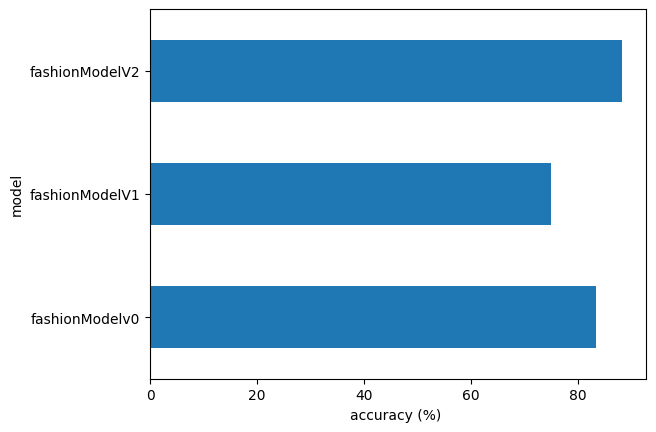

In [37]:
compare_results.set_index("model")["model_acc"].plot(kind = 'barh')
plt.xlabel("accuracy (%) ")
plt.ylabel("model");

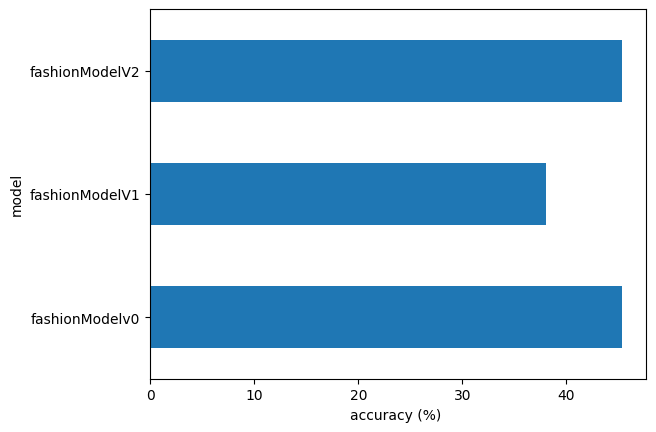

In [38]:
compare_results.set_index("model")["training_time"].plot(kind = 'barh')
plt.xlabel("accuracy (%) ")
plt.ylabel("model");

In [39]:

def make_predictions(model : torch.nn.Module,
                     data : list,
                     device : torch.device = device):

    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim = 0).to(device)

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(),dim = 0)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [40]:
import random
rand_seed = random.randint(1,42)
random.seed(rand_seed)

test_samples = []
test_labels = []

for sample , label in random.sample(list(test_data),k = 9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

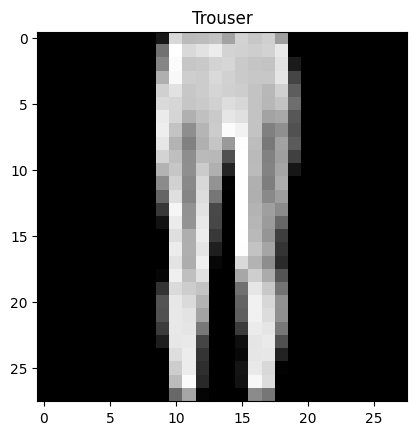

In [41]:
plt.imshow(test_samples[0].squeeze(),cmap = 'gray')
plt.title(class_names[test_labels[0]])

In [42]:
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

pred_probs[:2]


tensor([[2.9367e-05, 9.9972e-01, 1.3599e-06, 2.2275e-04, 1.9526e-05, 3.6137e-06,
         5.6136e-07, 3.5913e-07, 2.0222e-06, 6.0827e-08],
        [9.4867e-04, 3.4174e-05, 2.3516e-05, 3.0144e-05, 2.9409e-06, 9.9723e-01,
         1.1703e-04, 1.5057e-04, 1.0262e-03, 4.4079e-04]])

In [43]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([1, 5, 5, 5, 7, 8, 7, 3, 9])

In [44]:
test_labels

[1, 5, 5, 5, 7, 8, 7, 3, 9]

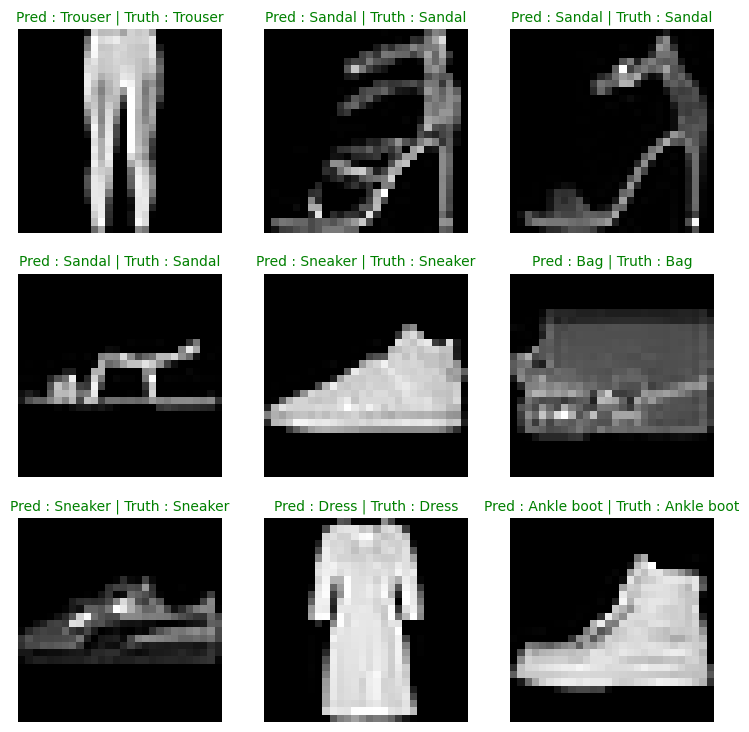

In [45]:
plt.figure(figsize = (9,9))

n_rows = 3
n_cols = 3

for i , sample in enumerate(test_samples):
    plt.subplot(n_rows,n_cols , i+1)
    plt.imshow(sample.squeeze(),cmap = 'gray')

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred : {pred_label} | Truth : {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text , fontsize = 10, c = 'g')
    else:
        plt.title(title_text , fontsize = 10, c = 'r')

    plt.axis(False)